Analizăm cele 68 de coloane... Te rog așteaptă.


/var/folders/0b/6vxnqnqj4s3gg4s3vzqkjplc0000gn/T/ipykernel_15839/4082566460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(15), palette='magma')


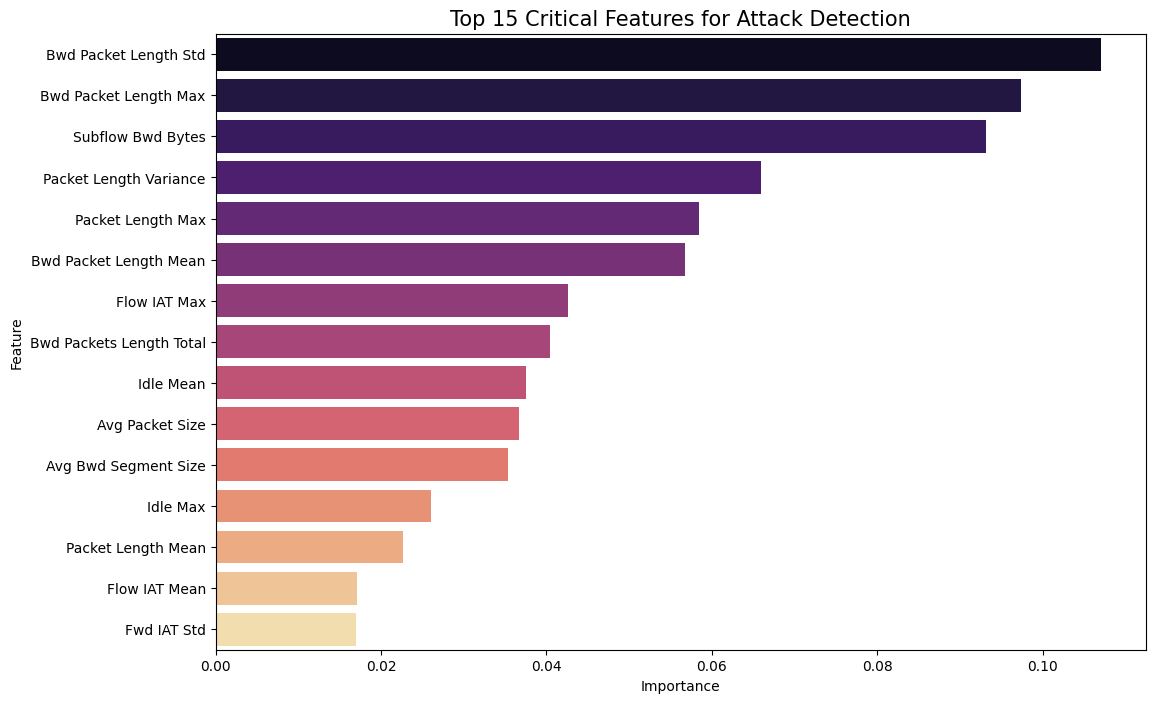

Top 15 Critical Features for Attack Detection
                   Feature  Importance
13   Bwd Packet Length Std    0.107056
10   Bwd Packet Length Max    0.097333
54       Subflow Bwd Bytes    0.093161
39  Packet Length Variance    0.065936
36       Packet Length Max    0.058391


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Încărcăm datele curățate (asigură-te că ai salvat fișierul anterior)
file_path = '../data/DoS-Wednesday-CLEANED.parquet'
df = pd.read_parquet(file_path)

# 2. Label Encoding (Transformăm textul în numere pentru model)
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

# 3. Pregătim datele pentru analiză
# X = Caracteristicile (toate coloanele minus Label)
# y = Rezultatul (doar coloana Label)
X = df.drop('Label', axis=1)
y = df['Label']

# 4. Antrenăm un Random Forest rapid (subset de 50 arbori pentru viteză)
# n_jobs=-1 folosește toate nucleele procesorului tău
print("Analizăm cele 68 de coloane... Te rog așteaptă.")
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X, y)

# 5. Extragem și sortăm importanța coloanelor
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 6. Vizualizăm Top 15 cele mai importante coloane
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances.head(15), palette='magma')
plt.title('Top 15 Critical Features for Attack Detection', fontsize=15)
plt.savefig('../data/plots/feature_importance15.png')
plt.show()


print("Top 15 Critical Features for Attack Detection")
print(importances.head(5))

📊 TOP 15 FEATURES ANALYSIS (PERCENTAGE):
--------------------------------------------------
Bwd Packet Length Std          | 10.71% (Cumulativ: 10.71%)
Bwd Packet Length Max          | 9.73% (Cumulativ: 20.44%)
Subflow Bwd Bytes              | 9.32% (Cumulativ: 29.76%)
Packet Length Variance         | 6.59% (Cumulativ: 36.35%)
Packet Length Max              | 5.84% (Cumulativ: 42.19%)
Bwd Packet Length Mean         | 5.68% (Cumulativ: 47.87%)
Flow IAT Max                   | 4.26% (Cumulativ: 52.12%)
Bwd Packets Length Total       | 4.04% (Cumulativ: 56.16%)
Idle Mean                      | 3.75% (Cumulativ: 59.91%)
Avg Packet Size                | 3.67% (Cumulativ: 63.58%)
Avg Bwd Segment Size           | 3.53% (Cumulativ: 67.11%)
Idle Max                       | 2.61% (Cumulativ: 69.71%)
Packet Length Mean             | 2.27% (Cumulativ: 71.98%)
Flow IAT Mean                  | 1.71% (Cumulativ: 73.69%)
Fwd IAT Std                    | 1.69% (Cumulativ: 75.39%)


/var/folders/0b/6vxnqnqj4s3gg4s3vzqkjplc0000gn/T/ipykernel_15839/2065269719.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance_Pct', y='Feature', data=top_15, ax=ax1, palette='magma')


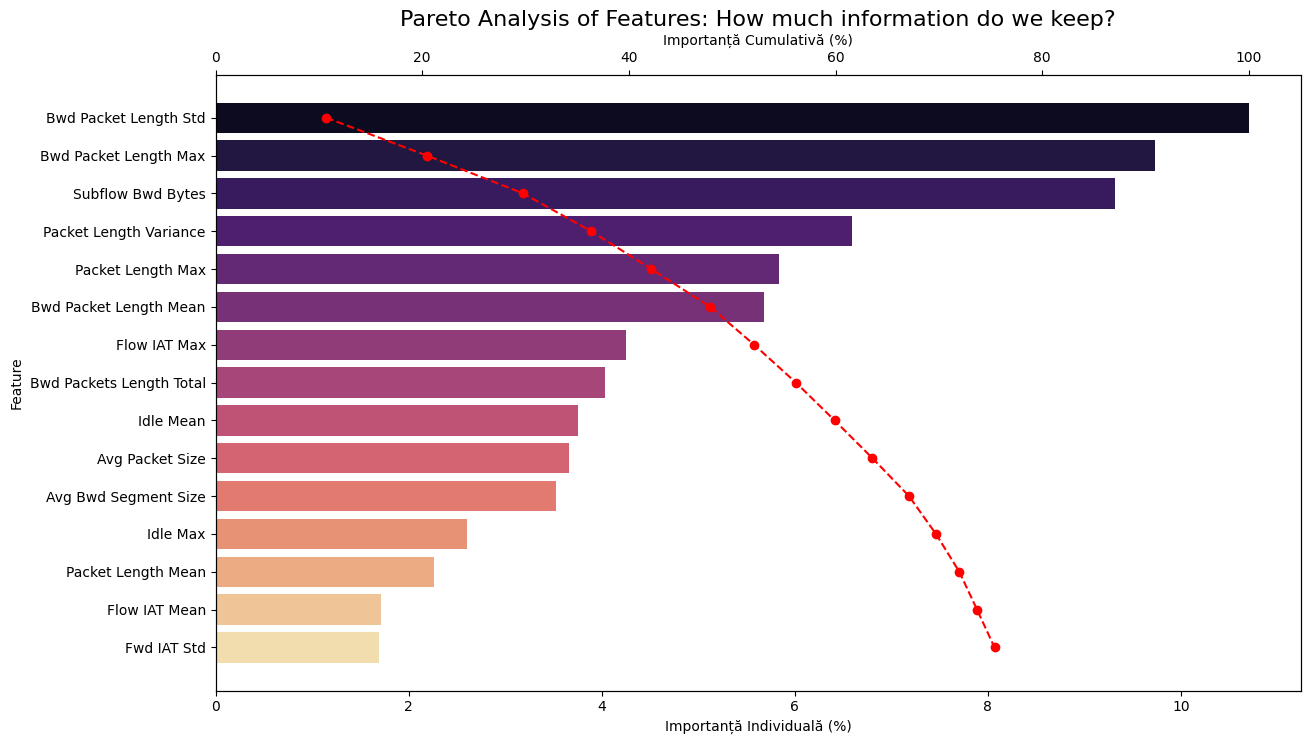

In [8]:
# 1. Convertim importanța în procente
importances['Importance_Pct'] = importances['Importance'] * 100

# 2. Calculăm importanța cumulativă (suma progresivă)
importances['Cumulative_Importance'] = importances['Importance_Pct'].cumsum()

# 3. Selectăm Top 15
top_15 = importances.head(15).copy()

print("📊 TOP 15 FEATURES ANALYSIS (PERCENTAGE):")
print("-" * 50)
for i, row in top_15.iterrows():
    print(f"{row['Feature']:<30} | {row['Importance_Pct']:.2f}% (Cumulativ: {row['Cumulative_Importance']:.2f}%)")

# 4. Vizualizare avansată: Grafic cu axă dublă (Pareto-style)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart pentru importanța individuală
sns.barplot(x='Importance_Pct', y='Feature', data=top_15, ax=ax1, palette='magma')
ax1.set_xlabel('Importanță Individuală (%)')

# Linie pentru importanța cumulativă
ax2 = ax1.twiny()
ax2.plot(top_15['Cumulative_Importance'], top_15['Feature'], color='red', marker='o', linestyle='--', label='Importanță Cumulativă')
ax2.set_xlabel('Importanță Cumulativă (%)')
ax2.set_xlim(0, 105)

plt.title('Pareto Analysis of Features: How much information do we keep?', fontsize=16)
plt.savefig('../data/plots/feature_importance_pareto.png')
plt.show()